<div style="color:#D81F26;
           display:fill;
           border-radius:200px;
           border-style: solid;
           border-width: 6px;
           border-color:#000000;
           background-color:#f5f5f5;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
AutoEncoders Coding
</h1>
</div>

<br>
<br>
<br>
<a href="https://imgbb.com/" class="center"><img src="https://i.ibb.co/TT8Wrm7/Keras.png" alt="Keras" border="0"></a>
<br>
<br>
<br>

**Note: It is an educational notebook for the Filoger Neural Network course that teaching by Amin Alipour.**

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Load Data</p>

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# AUTO ENCODER ----> Unsupervised ----> NO LABEL

# Mnist-Image ---> Encoder ----> Feature_EXT ---> Decoder--> Mnist-Image

In [3]:
X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/ 255.0

In [4]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [5]:
print("Shape of X train: ", X_train.shape)

print("Shape of X test: ", X_test.shape)

Shape of X train:  (60000, 28, 28)
Shape of X test:  (10000, 28, 28)


In [6]:
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train_noisy = X_train_noisy.reshape(len(X_train_noisy), 784)
X_test_noisy = X_test_noisy.reshape(len(X_test_noisy), 784)

In [7]:
print("Shape of X train: ", X_train.shape)

print("Shape of X test: ", X_test.shape)

Shape of X train:  (60000, 784)
Shape of X test:  (10000, 784)


# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Build a Model</p>

In [8]:
input_img = Input(shape=(784,))
encoder = Dense(units=32, activation='relu')(input_img)
####----> Featurs were extracted.(8*4)
decoder = Dense(units=784, activation= 'sigmoid')(encoder)
####---=> Images were constructed.

autoencoder =Model(input_img, decoder)
autoencoder.summary()

2022-06-24 05:29:04.641063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 05:29:04.753440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 05:29:04.754145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


2022-06-24 05:29:04.755894: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-24 05:29:04.756242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 05:29:04.757134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 05:29:04.757967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

<p style = "font-size : 15px; color : #D81F26 ; font-family : 'fantasy'; "><b>
<br>ENCODER: 784 -----> 32
<br>
<br>DECODER: 32 ------> 784
<br>
<br>params_1: 784*32 + 32
<br>
<br>params_2: 32*784 + 784

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy,X_train, epochs=30, batch_size=256 )

2022-06-24 05:29:08.582371: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
235/235 [==============================] - 2s 3ms/step - loss: 0.2827
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.2017
Epoch 3/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1742
Epoch 4/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1592
Epoch 5/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1476
Epoch 6/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1404
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.1357
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.1327
Epoch 9/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1307
Epoch 10/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1289
Epoch 11/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1279
Epoch 12/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1273
Epoch 13/30
235/235 [====

In [10]:
pred = autoencoder.predict(X_test_noisy)

In [11]:
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [12]:
encoder_model_pred = encoder_model.predict(X_test_noisy)

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Display data as an image</p>

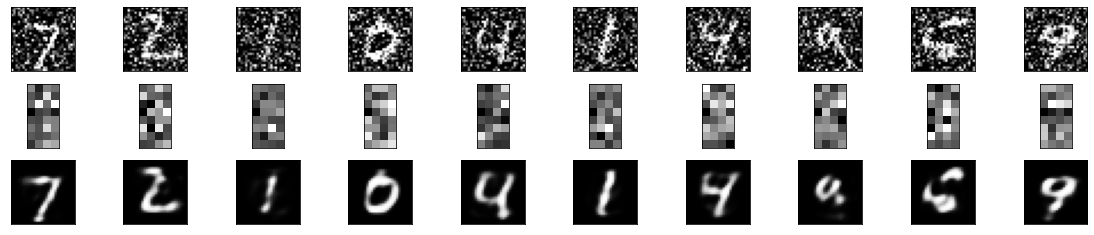

In [13]:
plt.figure(figsize=(40, 4))
for i in range(10):
    #original
    ax= plt.subplot(3, 20, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #features
    ax= plt.subplot(3, 20, i+1+20)
    plt.imshow(encoder_model_pred[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #constructed
    ax= plt.subplot(3, 20, i+1+2*20)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

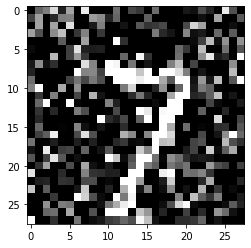

In [14]:
plt.imshow(X_test_noisy[0].reshape(28, 28))

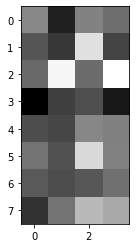

In [15]:
plt.imshow(encoder_model_pred[0].reshape(8, 4))

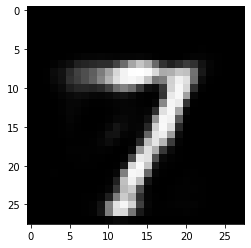

In [16]:
plt.imshow(pred[0].reshape(28, 28))

# <p style="padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Finished!</p>